질문해보자

업무시작일
// 전화소유가 없는사람도있는가?
//가족규모와 인컴 토탈이 1/n으로 되어야 하는게 아닌가?
//내 삶을 대입해 보면서 문제를 풀어보기
//문의는 카톡 또는 데이콘에서
//제출칸은 폴더, 파일을 클릭을 해서 열고 제출.


---
---

# <span style="color:fuchsia">**DAY 1 : EDA와 데이터 전처리** </span>


!conda install matplotlib
!conda install 
!conda install

In [8]:
import os 
import numpy as np # 행렬연산 및 기본연산 
import pandas as pd # 데이터 분석 및 전처리
import matplotlib as mpl # 시각화
import matplotlib.pyplot as plt
# pythion viersion 3.9

In [9]:
print('numpy version :', np.__version__)
print('pandas version :', pd.__version__)
print('matplotlib version :', mpl.__version__)

numpy version : 1.19.5
pandas version : 1.3.1
matplotlib version : 3.3.4


---
---

## <span style="color:fuchsia">**📚  1. 데이터 불러오기**</span> 
- os.path.join, pd.read_csv

In [10]:
# 맨첨에 경로자체를 변수로 설정을 해서 코랩에서 할때, 쥬피터에서 할 때, 
# os.path.join을 하면 자동으로 / 파일경로 쳐 줌.
BASE_DIR = './data' 
train_path = os.path.join(BASE_DIR, 'train.csv')
test_path = os.path.join(BASE_DIR, 'test.csv')

print(train_path)
print(test_path)

./data\train.csv
./data\test.csv


In [11]:
data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
target = data['credit']

---
---


## <span style="color:fuchsia">**📚  2. 데이터 살펴보기**</span> 
- Type, Shape, Missing Value, Statistics, Distribution, Outlier

데이터를 받으면 확인해야할 것 # data.info() -> type, shape, columns, missing value, Dtype 확인 가능

1. 컬럼 별 데이터의 형태 (Type) # 전처리가 필요한가, 
2. 데이터 개수 (Shape)
3. 데이터 결측치 (Missing Value) # 머신러닝모델 오류
4. 데이터 통계값 (Statistics) # 대표적인 값, 평균, 분산, 표준편차, 중간값, 4분위값 등
5. 데이터의 분포 (Distribution) # 시각화해서 볼 것.
6. 데이터의 예외값 (Outlier) 
---
### <span style="color:fuchsia">**📚  2-1. 데이터 대략적으로 이해하기**</span>
- data.info, data.dtypes, data.describe

In [6]:
data.head() # 컬럼별 형태나 , 데이터 예측

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


데이터를 꼼꼼히 볼것

- `index`: 인덱스
- `gender`: 성별
- `car`: 차량 소유 여부
- `reality`: 부동산 소유 여부
- `child_num`: 자녀 수
- `income_total`: 연간 소득 # 달러로 예측
- `income_type`: 소득 분류
    - ['Commercial associate', 'Working', 'State servant', 'Pensioner', 'Student']
- `edu_type`: 교육 수준 
    - ['Higher education' ,'Secondary / secondary special', 'Incomplete higher', 'Lower secondary', 'Academic degree']
- `family_type`: 결혼 여부 
    - ['Married', 'Civil marriage', 'Separated', 'Single / not married', 'Widow']
- `house_type`: 생활 방식
    - ['Municipal apartment', 'House / apartment', 'With parents', 'Co-op apartment', 'Rented apartment', 'Office apartment']
- `DAYS_BIRTH`: 출생일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전에 태어났음을 의미
- `DAYS_EMPLOYED`: 업무 시작일
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 하루 전부터 일을 시작함을 의미
    - 양수 값은 고용되지 않은 상태를 의미함
- `FLAG_MOBIL`: 핸드폰 소유 여부
- `work_phone`: 업무용 전화 소유 여부
- `phone`: 전화 소유 여부
- `email`: 이메일 소유 여부
- `occyp_type`: 직업 유형	# NaN 잘못 되어있거나, 결측치												
- `family_size`: 가족 규모 # 소수점있으면 안될 것 실수로 변환
- `begin_month`: 신용카드 발급 월
    - 데이터 수집 당시 (0)부터 역으로 셈, 즉, -1은 데이터 수집일 한 달 전에 신용카드를 발급함을 의미
- `credit`: 사용자의 신용카드 대금 연체를 기준으로 한 신용도
    - => 낮을 수록 높은 신용의 신용카드 사용자를 의미함

In [7]:
data.info() 
# 컬럼정보확인가능. 직업유형만 결측치가 있으니 전처리가 필요하다. 
# dtype object 범주형(카테고리형) 머신러닝을 거쳐야함. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

범주형과 수치형을 분류해서 살펴본다.

In [12]:
# for dt_inx, dt in zip(data.dtypes.index):
# print(dt_index, dt)
# 카테고리 컬럼은 다 전처리가 필요하다고 생각하면 된다.
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]

print(f'Categorical Columns: \n{cat_columns}\n')
print(f'Numeric Columns: \n{num_columns}\n')

Categorical Columns: 
['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']

Numeric Columns: 
['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']



In [13]:
data.describe().T # 특정 컬럼 컬러링가능
# use style
# 평균과 중간값 min, max확인이 가장 중요
# 얼마나 편향되어있는가를 볼 수 있음
# 데이터의 범위로 min, max outlier로 
# income_total 70배 차이.. 데이터를 살펴봐야겠다.
# describe 수치형데이터만

,count,mean,std,min,25%,50%,75%,max
index,26457.0,13228.000000,7637.622372,0.0,6614.0,13228.0,19842.0,26456.0
child_num,26457.0,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0
income_total,26457.0,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
DAYS_BIRTH,26457.0,-15958.053899,4201.589022,-25152.0,-19431.0,-15547.0,-12446.0,-7705.0
DAYS_EMPLOYED,26457.0,59068.750728,137475.427503,-15713.0,-3153.0,-1539.0,-407.0,365243.0
FLAG_MOBIL,26457.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
work_phone,26457.0,0.224742,0.417420,0.0,0.0,0.0,0.0,1.0
phone,26457.0,0.294251,0.455714,0.0,0.0,0.0,1.0,1.0
email,26457.0,0.091280,0.288013,0.0,0.0,0.0,0.0,1.0
family_size,26457.0,2.196848,0.916717,1.0,2.0,2.0,3.0,20.0


In [14]:
data.describe(include='O').T # 카테고리형,범주형만 보여줌.
# unique 종류
# 데이터를 어떤 목적으로 쌓았는지도 알 수 있음. 원래 수집했던사람은 이정도면 충분하다고 생각했던것. 왜 이렇게 나눴을까 생각하는것도 모델링관점에서 도움이 될것.

,count,unique,top,freq
gender,26457,2,F,17697
car,26457,2,N,16410
reality,26457,2,Y,17830
income_type,26457,5,Working,13645
edu_type,26457,5,Secondary / secondary special,17995
family_type,26457,5,Married,18196
house_type,26457,6,House / apartment,23653
occyp_type,18286,18,Laborers,4512


In [15]:
data.describe(include='all').T 
# 카테고리 정보에서 뉴머릭한 정보는 필요없음.
# 따로 보는게 강사는 낫다고 생각.

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
index,26457.0,NaN,NaN,NaN,13228.0,7637.622372,0.0,6614.0,13228.0,19842.0,26456.0
gender,26457,2,F,17697,NaN,NaN,NaN,NaN,NaN,NaN,NaN
car,26457,2,N,16410,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reality,26457,2,Y,17830,NaN,NaN,NaN,NaN,NaN,NaN,NaN
child_num,26457.0,NaN,NaN,NaN,0.428658,0.747326,0.0,0.0,0.0,1.0,19.0
income_total,26457.0,NaN,NaN,NaN,187306.524493,101878.367995,27000.0,121500.0,157500.0,225000.0,1575000.0
income_type,26457,5,Working,13645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
edu_type,26457,5,Secondary / secondary special,17995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_type,26457,5,Married,18196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
house_type,26457,6,House / apartment,23653,NaN,NaN,NaN,NaN,NaN,NaN,NaN


---
### <span style="color:fuchsia">**📚 2-2. 데이터 결측치, 분포, 예외치 확인하기**</span> 
- msno.matrix,data.isna().sum, .value_counts // sns.countplot.histplot.kdeplot.scatterplot // .value_counts().sort_values, .groupby(['',''])[''].mean, data[['']].describe


In [16]:
# !conda install missingno

<AxesSubplot:>

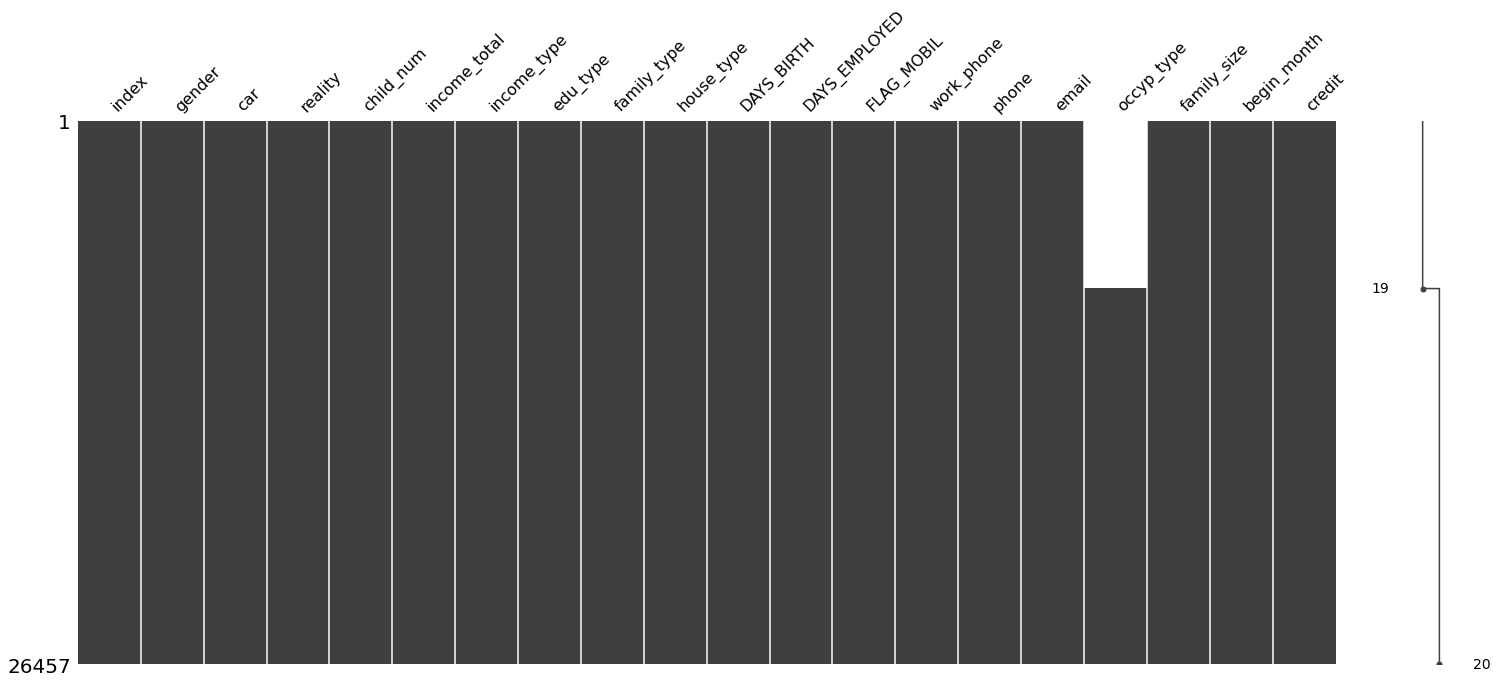

In [17]:
# 대부분의 머신러닝 모델들은 결측치를 받아들이지 못함.
# 데이터에서는 0 !=Null != {}
# 결측치 채우는것은 연구가 되고있음. catboosting이런건 결측치를 알아서 채워줌.
import missingno as msno

msno.matrix(data, sort='ascending')

In [18]:
data.isna().sum() / len(data)
# NaN, Null # 퍼센트로 나타냄. 
# 30%정도면 채워주눈게 낫다.
# 오류가 많이 생길수 있고 머신러닝입장ㅇ서 노이즈로 생각.
# 결측치를 채우는 것 보다는 안쓰는 방향.. 
# 그래도 중요하다면 어떤 특징? 
# 30% 내외 결측치 채워주는게 국룰

index            0.000000
gender           0.000000
car              0.000000
reality          0.000000
child_num        0.000000
income_total     0.000000
income_type      0.000000
edu_type         0.000000
family_type      0.000000
house_type       0.000000
DAYS_BIRTH       0.000000
DAYS_EMPLOYED    0.000000
FLAG_MOBIL       0.000000
work_phone       0.000000
phone            0.000000
email            0.000000
occyp_type       0.308841
family_size      0.000000
begin_month      0.000000
credit           0.000000
dtype: float64

In [19]:
import seaborn as sns

In [20]:
data['gender'].value_counts()
# data['car'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

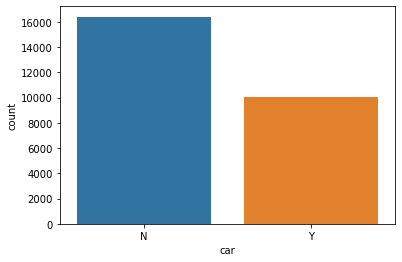

In [21]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x = 'car')
plt.show()

In [22]:
cat_columns

['gender',
 'car',
 'reality',
 'income_type',
 'edu_type',
 'family_type',
 'house_type',
 'occyp_type']

In [23]:
# 강사는 선호하지 않음. 
# 크기순으로 지정하려면 order를 쳐야됨

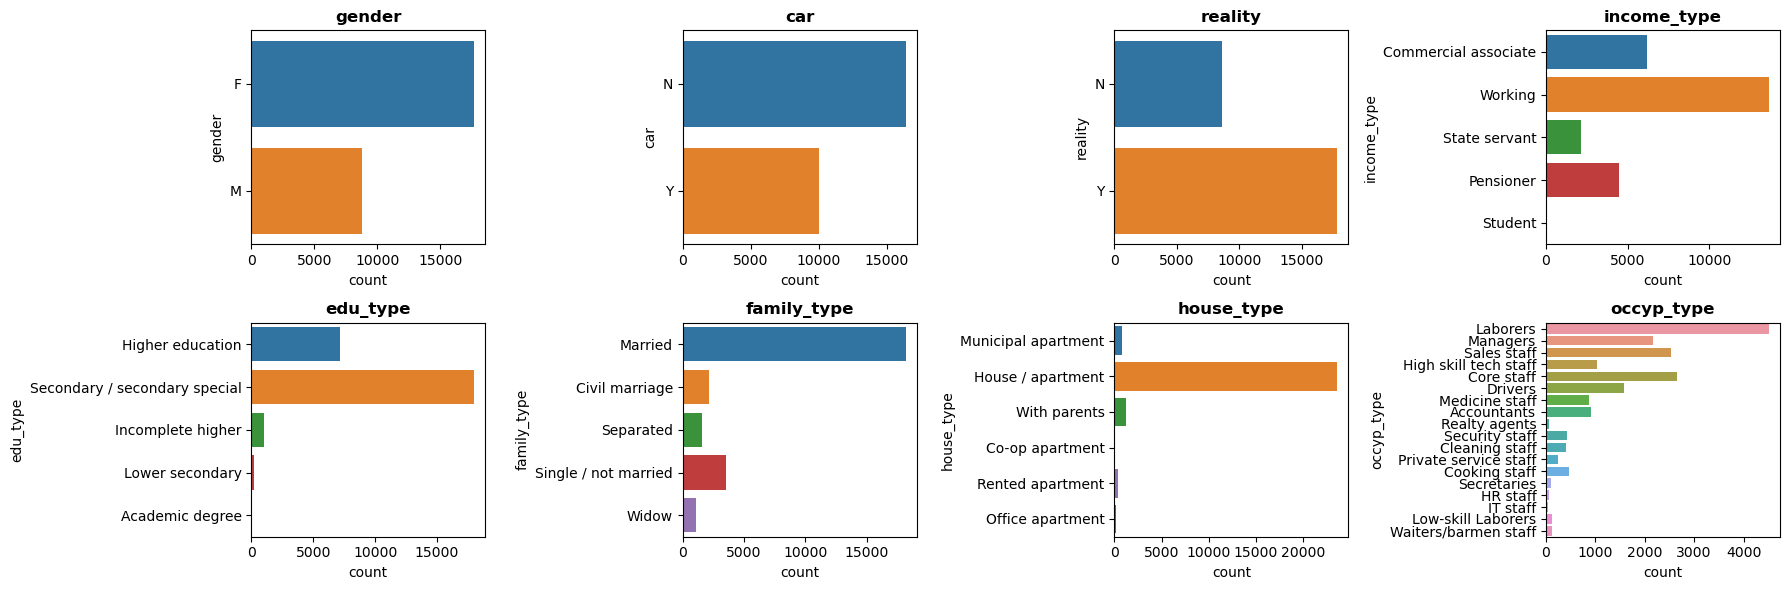

In [24]:
fig, ax = plt.subplots(2,4, figsize=(18,6), dpi=100)
# ax[0][1].plot([1,2,3])
# print(ax.flatten())
for col, ax in zip(cat_columns, ax.flatten()):
    sns.countplot(data=data, y=col, ax=ax)
    
#     print(data[col].value_counts())
#     break
    ax.set_title(col, fontweight='bold')
    
fig.tight_layout() # 안겹치게 만ㄷ름
plt.show()

> value_counts를 사용한다면..?

In [25]:
data['gender'].value_counts()

F    17697
M     8760
Name: gender, dtype: int64

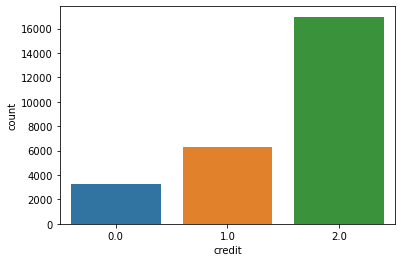

In [26]:
fig, ax = plt.subplots(1,1)
sns.countplot(data=data, x='credit')
plt.show() #낮을수록 높은 신용등급 사용자. 예측을 했을 떄 이정도 라는 것을 보는 것도 중요
# 추세를 보는 것도 중요

In [27]:
data['credit'].value_counts().sort_values()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [28]:
data['credit'].value_counts().sort_index()

0.0     3222
1.0     6267
2.0    16968
Name: credit, dtype: int64

In [29]:
# 커스텀도 가능하다. sorting 할 때
# data['credit']zzzzzzzㅋㅋㅋㅋ 그냥 넘어감 ㅋㅋㅋ

In [30]:
# 비율저옵를 보기 위해 개수로 나눔
data['credit'].value_counts().sort_index() / len(data)* 100
# 0,1과 2등급을 먼저 구분하고 0,1등급을 구분하기
# classification, hightical classification 했을 떄 잘될 떄가 있따.

0.0    12.178252
1.0    23.687493
2.0    64.134256
Name: credit, dtype: float64

<AxesSubplot:xlabel='car', ylabel='count'>

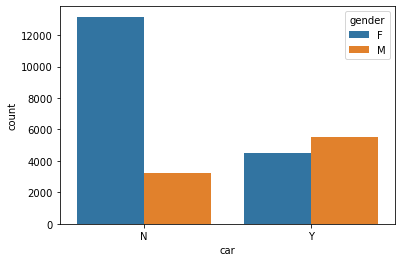

In [31]:
sns.countplot(data=data, x='car', hue='gender')

<AxesSubplot:xlabel='gender', ylabel='count'>

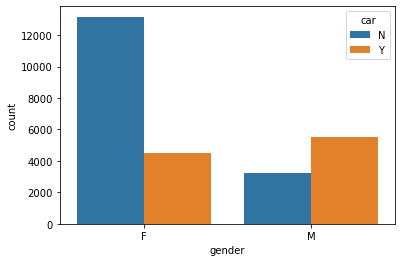

In [32]:
sns.countplot(data=data, x='gender', hue='car') 
# 불균형이 너무 심하다고 하면 따로따로 한 다음 합치는 방법도 있음.
# 직접적인 수치값으로 보고싶을 수 있음.
# 판다스에는 groupby라는 명령어가 있음

In [33]:
data.groupby(['gender','car'])['reality'].value_counts() / len(data)*100 
# 기업에게 중요한 정보가 될 수 있음
# 더 세분화 시킬 수 있음.
# 요런게 EDA

gender  car  reality
F       N    Y          34.569301
             N          15.194466
        Y    Y          11.588615
             N           5.537287
M       N    Y           7.608572
             N           4.652833
        Y    Y          13.625884
             N           7.223041
Name: reality, dtype: float64

In [34]:
data.groupby(['gender','car'])['income_total'].mean()

gender  car
F       N      163331.793901
        Y      201413.789782
M       N      198545.108970
        Y      226333.594090
Name: income_total, dtype: float64

In [35]:
print(data[['income_total']].describe())
# kdeplot은 근사를 가지고 보여준다.
# 어떤 간격으로 근사되었는지  bw_method

       income_total
count  2.645700e+04
mean   1.873065e+05
std    1.018784e+05
min    2.700000e+04
25%    1.215000e+05
50%    1.575000e+05
75%    2.250000e+05
max    1.575000e+06


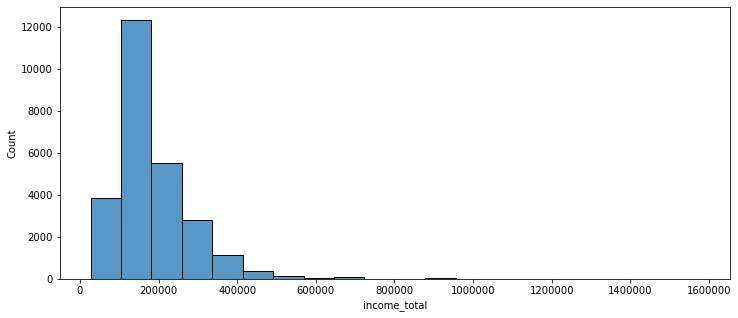

In [36]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
# kernel density estimation # 추세를 보기 좋음.
# sns.kdeplot(data=data, x='income_total', ax=ax, fill=True,
#            bw_method=0.1, cut=0
#            ) 
# 항상 fill=true로 둬서 밑의 면적을 채워주눈게 좋음, 
sns.histplot(data=data, x='income_total', ax=ax, bins=20)
ax.ticklabel_format(style='plain') 
# 눈금들을 tick의 label을 plain 꾸미지 않게 ㅁ바꿔준다. 
# 데이터가 너무 길어서 안보이면 
# 1) ticklabe을 세로로, 
# 2) fig사이즈를 크게만들어준다.
plt.show()

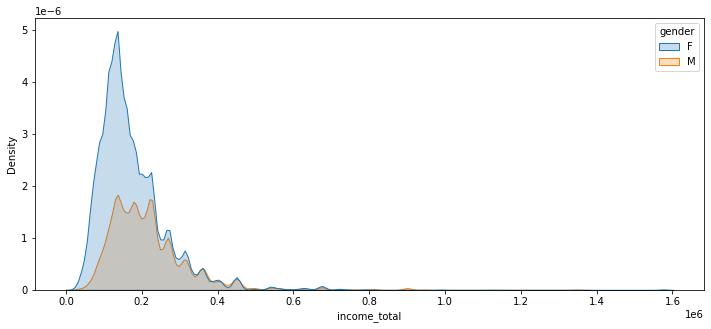

In [37]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.kdeplot(data=data, x='income_total', hue='gender',
            bw_method=0.1, fill=True, ax=ax)
# ax.ticklabel_format(style='plain')
plt.show()
# 25000 소득권에서 어떻게 데이터가 나뉘는지
# 범위적인 정보(구체적인 정보)를 안적어 내기떄문에 띄엄띄엄 수치가 나올 수 있지 않나 라는 예상.
# ㅋㅋㅋㅋ키 
# 범위로써 데이터를 쓸것인가 고민.
# incometotal을 feature로 보는 것.
# 어떤 관계에 있는지 보는 것. -> scatter plot
# areaplot

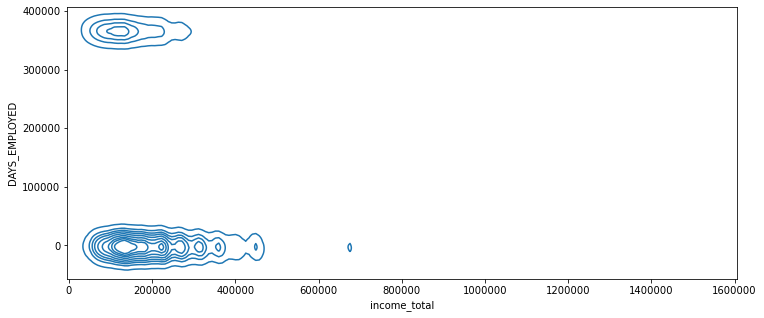

In [38]:
fig, ax = plt.subplots(1,1, figsize=(12,5)) # 데이터를 근사, 시간이 좀 오래걸림.
sns.kdeplot(data=data, x='income_total', y='DAYS_EMPLOYED',
            bw_method=0.1,
            ax=ax)
ax.ticklabel_format(style='plain')
plt.show()
# 등고선 플롯으로 보임.
# 데이터에 밀집된 정도에 따라 촘촘한 정도가 다름. 개꿀.
# 앞쪽에 데이터가 몰려있다라는 걸 볼 수 있음.
# bw 조정 
# 개오래걸리네..
# 등고선플롯

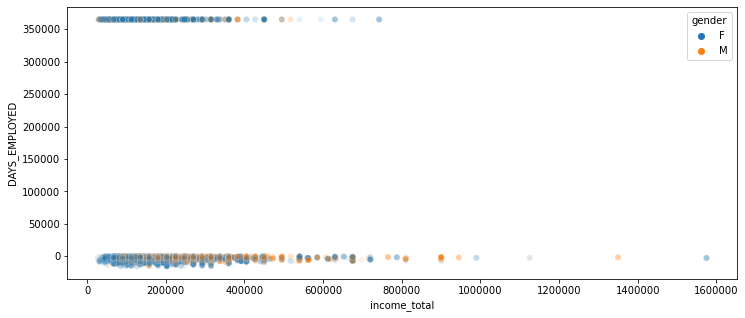

In [39]:
fig, ax = plt.subplots(1,1, figsize=(12,5))
sns.scatterplot(data=data, x='income_total', y='DAYS_EMPLOYED',
                hue='gender', # 색상
                alpha=0.1, # 투명도
                ax=ax)
ax.ticklabel_format(style='plain')
plt.show()

%time 10 ** 10000
%time 1234 ** 1000
 
값을 정규분포로 맞춰주는게 중요(속도떄매)

In [40]:
100000000000000 + 0.00000000001 # 파이썬에선 (실수오차를)그냥 근사해버림.

100000000000000.0

---
---
## <span style="color:fuchsia">**📚 3. 데이터 스케일링**</span> 
- sklearn.preprocessing, scaler.fit, scaler.transform, pd.DataFrame //

### <span style="color:fuchsia">**📚 3-1. 스케일링을 하는 이유**</span>

변수의 크기가 너무 작거나, 너무 큰 경우 해당 변수가 Target 에 미치는 영향력이 제대로 표현되지 않을 수 있습니다.

Sklearn의 대표적인 스케일링 함수로는 특정 변수의 최대, 최소 값으로 조절하는 Min-Max 스케일링과 z-정규화를 이용한 Standard 스케일링이 있습니다. (사용법 체크) (SVM은 무조건)

<div class="alert alert-block alert-danger">
    <b>주의</b> 스케일링은 변수의 분포를 변경하지 않습니다. # 연산의 효율성과 정확도를 위해서 한다.
</div>

> 주의 > 스케일링은 변수의 분포를 변경하지 않습니다. 
---
### <span style="color:fuchsia">**📚 3-2. Min-Max Scaling**</span> 
- ___ .min.max, .apply(lambda x : x/income_max)


- Min-Max 스케일링을 하면, 값의 범위가 0 ~ 1 사이로 변경됩니다. <br> 
- 최댓값을 1, 최솟값을 0으로 변경합니다.

수식을 직관적으로 이해해보면, X에 존재하는 어떤 가장 작은 값 x <sub>m</sub>에 대해서 x <sub>m</sub>는 Min(X)의 값과 같습니다. 

따라서 스케일링 후 x<sub>m</sub>은 0이되고, X에 존재하는 어떤 가장 큰 값x <sub>M</sub>은 분모의 식과 같아지므로 1이됩니다.

$$ x - Min(X) \over Max(X) - Min(X) $$<br>
$$X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$ 

 * 앞서 변수의 분포를 변경하진 않는데 수익자체는 배수가 중요할 수 있음. 0과 1의 비율 자체는 사라지게 되는 것. 비율정보에 민감하다고 했을 때 사라지게 되는 것. -> 민맥스로 하지말고 맥스로 나눠버리는 것, 미니멈은 0은 아니게 되는 것. 
 * 구현하는 건 어렵지 않음. 
 * 사이킷런 페이지// 머신러닝을 위한 다양한 기능을 제공, 전처리 다수, 대표적인 것만 써보게 될 것. 전처리만 모아놓은 라이브러리도 있음.


직접 구현도 크게 어렵지 않지만, `Sklearn`에서 Min-Max Scaler는 preprocessing 패키지에 있습니다. 

#### Reference

- [Scikit-learn Min-Max Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html?highlight=minmax#sklearn.preprocessing.MinMaxScaler)


In [41]:
income_data = data[['income_total']].values
income_data

array([[202500.],
       [247500.],
       [450000.],
       ...,
       [292500.],
       [171000.],
       [ 81000.]])

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler)

MinMaxScaler()


In [43]:
scaler.fit(income_data)

print(scaler.data_min_)
print(scaler.data_max_)

[27000.]
[1575000.]


In [44]:
scaled_data = scaler.transform(income_data)
# scaled_data = scaler.fit_transform(income_data) # 항상 train에서 사용
print(scaled_data[0], income_data[0])
# scaled_data = pd.DataFrame(scaled_data, columns=num_columns)


[0.11337209] [202500.]


In [45]:
num_data = data[num_columns].values

In [46]:
scaler = MinMaxScaler()
scaler.fit(num_data)

MinMaxScaler()

하지말것 train + test => min/max를 뽑고 => min/max scaler // 항상 트레인에서만 스케일링 진행

In [47]:
print(scaler.data_min_)
print(scaler.data_max_)

[ 0.0000e+00  0.0000e+00  2.7000e+04 -2.5152e+04 -1.5713e+04  1.0000e+00
  0.0000e+00  0.0000e+00  0.0000e+00  1.0000e+00 -6.0000e+01  0.0000e+00]
[ 2.64560e+04  1.90000e+01  1.57500e+06 -7.70500e+03  3.65243e+05
  1.00000e+00  1.00000e+00  1.00000e+00  1.00000e+00  2.00000e+01
  0.00000e+00  2.00000e+00]


In [48]:
scaled_data = scaler.transform(num_data)
scaled_data = pd.DataFrame(data = scaled_data, columns=num_columns)
# credit은 바뀌면 안되는데 바뀌었음. 뺴주셈.
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0.000000,0.000000,0.113372,0.644982,0.028885,0.0,0.0,0.0,0.0,0.052632,0.900000,0.5
1,0.000038,0.052632,0.142442,0.789362,0.037204,0.0,0.0,0.0,1.0,0.105263,0.916667,0.5
2,0.000076,0.000000,0.273256,0.347624,0.029607,0.0,0.0,1.0,0.0,0.052632,0.633333,1.0
3,0.000113,0.000000,0.113372,0.576833,0.035755,0.0,0.0,1.0,0.0,0.052632,0.383333,0.0
4,0.000151,0.000000,0.084302,0.579756,0.035721,0.0,0.0,0.0,0.0,0.052632,0.566667,1.0


In [49]:
data[num_columns].head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [50]:
data[num_columns].describe()  

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [51]:
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0.000000,0.000000,0.113372,0.644982,0.028885,0.0,0.0,0.0,0.0,0.052632,0.900000,0.5
1,0.000038,0.052632,0.142442,0.789362,0.037204,0.0,0.0,0.0,1.0,0.105263,0.916667,0.5
2,0.000076,0.000000,0.273256,0.347624,0.029607,0.0,0.0,1.0,0.0,0.052632,0.633333,1.0
3,0.000113,0.000000,0.113372,0.576833,0.035755,0.0,0.0,1.0,0.0,0.052632,0.383333,0.0
4,0.000151,0.000000,0.084302,0.579756,0.035721,0.0,0.0,0.0,0.0,0.052632,0.566667,1.0


In [52]:
scaled_data.describe() # flag_mobil 필요없는 건 빼주는게 속도적인 측면에서 도움.

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,0.500000,0.022561,0.103557,0.526964,0.196300,0.0,0.224742,0.294251,0.091280,0.062992,0.564612,0.759780
std,0.288692,0.039333,0.065813,0.240820,0.360870,0.0,0.417420,0.455714,0.288013,0.048248,0.275992,0.351141
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.000000,0.061047,0.327907,0.032970,0.0,0.000000,0.000000,0.000000,0.052632,0.350000,0.500000
50%,0.500000,0.000000,0.084302,0.550524,0.037206,0.0,0.000000,0.000000,0.000000,0.052632,0.600000,1.000000
75%,0.750000,0.052632,0.127907,0.728263,0.040178,0.0,0.000000,1.000000,0.000000,0.105263,0.800000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
income_min = data['income_total'].min()
income_max = data['income_total'].max()

data['income_total'].apply(lambda x : x/income_max)

0        0.128571
1        0.157143
2        0.285714
3        0.128571
4        0.100000
           ...   
26452    0.142857
26453    0.114286
26454    0.185714
26455    0.108571
26456    0.051429
Name: income_total, Length: 26457, dtype: float64

---
### <span style="color:fuchsia">**📚 3-3. Standard Scaling**</span>

데이터를 통계적으로 표준정규분포화 시켜 스케일링을 하는 방식입니다. `z-score 정규화` 라고도 합니다.

데이터의 평균이 0, 표준 편차가 1이 되도록 스케일링 합니다.

$$ z = {{x - \mu} \over {\sigma}} $$
$$ \mu : 데이터의\ 평균, mean(X) $$
$$ \sigma : 데이터의\ 표준편차, std(X)$$
$$ X : 데이터\ 셋 $$
$$ x : 데이터\ 샘플 $$

`Sklearn`에서 Standard Scaler는 preprocessing 패키지에 있습니다.

#### Reference

- [Scikit-learn, Standard Scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)

In [58]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [64]:
numeric_data = data[num_columns]
scaled_data = scaler.fit_transform(numeric_data)

In [65]:
scaled_data = scaler.transform(numeric_data)
scaled_data = pd.DataFrame(scaled_data, columns=num_columns)

In [66]:
data[num_columns].head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,202500.0,-13899,-4709,1,0,0,0,2.0,-6.0,1.0
1,1,1,247500.0,-11380,-1540,1,0,0,1,3.0,-5.0,1.0
2,2,0,450000.0,-19087,-4434,1,0,1,0,2.0,-22.0,2.0
3,3,0,202500.0,-15088,-2092,1,0,1,0,2.0,-37.0,0.0
4,4,0,157500.0,-15037,-2105,1,0,0,0,2.0,-26.0,2.0


In [67]:
data[num_columns].describe()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,26457.000000,26457.000000,2.645700e+04,26457.000000,26457.000000,26457.0,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000,26457.000000
mean,13228.000000,0.428658,1.873065e+05,-15958.053899,59068.750728,1.0,0.224742,0.294251,0.091280,2.196848,-26.123294,1.519560
std,7637.622372,0.747326,1.018784e+05,4201.589022,137475.427503,0.0,0.417420,0.455714,0.288013,0.916717,16.559550,0.702283
min,0.000000,0.000000,2.700000e+04,-25152.000000,-15713.000000,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,0.000000
25%,6614.000000,0.000000,1.215000e+05,-19431.000000,-3153.000000,1.0,0.000000,0.000000,0.000000,2.000000,-39.000000,1.000000
50%,13228.000000,0.000000,1.575000e+05,-15547.000000,-1539.000000,1.0,0.000000,0.000000,0.000000,2.000000,-24.000000,2.000000
75%,19842.000000,1.000000,2.250000e+05,-12446.000000,-407.000000,1.0,0.000000,1.000000,0.000000,3.000000,-12.000000,2.000000
max,26456.000000,19.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,2.000000


In [68]:
scaled_data.head()

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,-1.731985,-0.573599,0.149136,0.490075,-0.463930,0.0,-0.538417,-0.645705,-0.316937,-0.214735,1.215231,-0.739830
1,-1.731854,0.764529,0.590848,1.089621,-0.440878,0.0,-0.538417,-0.645705,3.155199,0.876135,1.275620,-0.739830
2,-1.731723,-0.573599,2.578550,-0.744719,-0.461929,0.0,-0.538417,1.548696,-0.316937,-0.214735,0.249003,0.684125
3,-1.731593,-0.573599,0.149136,0.207081,-0.444893,0.0,-0.538417,1.548696,-0.316937,-0.214735,-0.656836,-2.163785
4,-1.731462,-0.573599,-0.292575,0.219220,-0.444988,0.0,-0.538417,-0.645705,-0.316937,-0.214735,0.007446,0.684125


In [69]:
scaled_data.describe()
# 램덤포레스트, 트리베이스드 모델들은 수의 대소관계로 비교. 스케일링 자체가 필요없을 수도.
# 어떤데이터가 편중되어있는지, 어떤데이터가 아웃라이어가 많은지 볼 수 있음.
# 모델의성능이 굉장히 좋아지는 편
# 데이터가 정규분포를 가져가고 있다.

,index,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
count,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,26457.0,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04,2.645700e+04
mean,5.078399e-17,-1.034034e-15,8.005171e-16,8.393080e-17,1.378914e-16,0.0,1.437772e-15,-4.122559e-16,-6.303097e-16,-3.448964e-17,-4.292258e-16,4.235020e-16
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.0,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00
min,-1.731985e+00,-5.735993e-01,-1.573539e+00,-2.188248e+00,-5.439748e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-1.305605e+00,-2.045789e+00,-2.163785e+00
25%,-8.659927e-01,-5.735993e-01,-6.459445e-01,-8.265948e-01,-4.526113e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,-7.776147e-01,-7.398300e-01
50%,0.000000e+00,-5.735993e-01,-2.925752e-01,9.783481e-02,-4.408708e-01,0.0,-5.384173e-01,-6.457046e-01,-3.169372e-01,-2.147353e-01,1.282242e-01,6.841248e-01
75%,8.659927e-01,7.645293e-01,3.699921e-01,8.359029e-01,-4.326364e-01,0.0,-5.384173e-01,1.548696e+00,-3.169372e-01,8.761348e-01,8.528952e-01,6.841248e-01
max,1.731985e+00,2.485084e+01,1.362134e+01,1.964307e+00,2.227162e+00,0.0,1.857295e+00,1.548696e+00,3.155199e+00,1.942093e+01,1.577566e+00,6.841248e-01


기존 데이터에서는 변수별로 서로 다른 평균과 표준 편차 값을 가지고 있었습니다.

Standard 스케일링된 데이터를 살펴보면, 평균이 0 표준편차가 1이 되었음을 확인할 수 있습니다.

### <span style="color:fuchsia">**📚 3-4. Log Transformation**</span> 
- ___ sns.histplot

변수의 범위를 조정하는 Min-Max Scaling과 Standard Scaling을 확인했습니다.<br>
이번에는 치우친 분포(skew)의 형태를 보정해주는 방법 중 하나인 Log Transformation에 대해 배우겠습니다.

로그 변환은 어떤 변수의 범위가 양수인 경우 사용할 수 있으며, 각 변수에 대해 자연 로그를 취하는 연산 입니다.

해당 연산을 적용하면, 다음과 같은 왼쪽으로 치우친 분포(왼쪽)를 좋은 형태(오른쪽)의 정규 분포의 형태로 만들어줄 수 있습니다.

이는 왼쪽 그림에서 오른쪽으로 치우친 큰 값들을 작게(지수로) 표현함으로써 분포를 왼쪽으로 당기는 효과를 줄 수 있기 때문입니다.

<img src='https://miro.medium.com/max/1620/1*O2R4nH0nR6d3bOxaYU10lg.png'>

#### ref
- [Log Transformation](https://medium.com/@kyawsawhtoon/log-transformation-purpose-and-interpretation-9444b4b049c9)

In [111]:
# 로그변환은 범위가 양수일떄만 가능
# 양변에 자연로그를 취함.
# 로그를 씌우면 큰 값은 엄청 줄어듦.
print(np.log2(2))
print(np.log2(1024))
# 자연로그를 씌우느냐 아님 다른 로그 움직임의 정도가 달라질 수 있다.
# 우편향 되어있따? 오른쪽에 데이터가 많다. -> 익스포넨셜? 값이 너무커지기 떄문에 고려해야함.

1.0
10.0


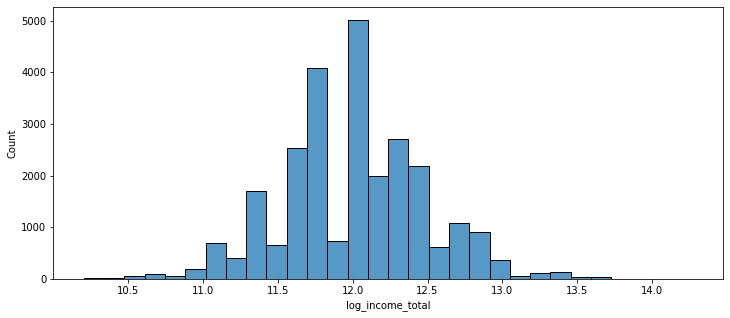

In [129]:
# 로그 변환 전
fig, ax = plt.subplots(1, 1, figsize=(12, 5))
scaled_data['log_income_total'] = np.log(data['income_total'])
sns.histplot(data=scaled_data, x='log_income_total', bins=30)
plt.show()

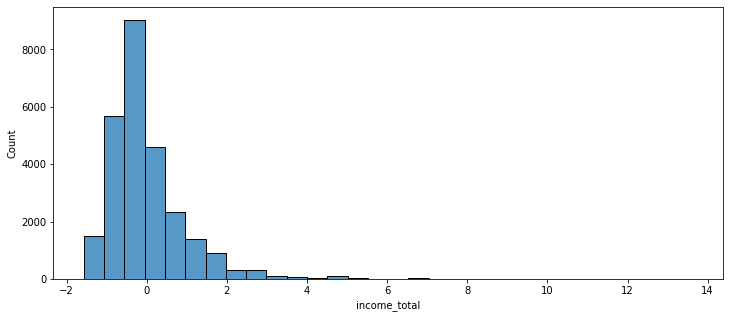

In [115]:
# 로그 변환 후
fig, ax = plt.subplots(1,1,figsize=(12,5))
scaled_data['log_income_total'] = np.log(data['income_total'])
sns.histplot(data=scaled_data, x='income_total', bins=30)
plt.show()
ㅅㅂ놓침


### <span style="color:fuchsia">**📚 3-5. Box-Cox, Yeo-Johnson, Quantile Transformation**</span>

여러가지 변환이 있습니다. 

세가지 변환 모두 치우친 분포의 데이터를 정규 분포로 보정해주는 효과가 있으며,

Box-Cox 변환의 경우 Log 변환과 함께 양수에만 적용할 수 있는 변환이고, 

Yeo-Johnson 변환은 Box-Cox 변환의 제약인 음수를 가진 변수에서도 변환을 할 수 있는 변환입니다.

Quantile 변환은 가장 자주 발생하는 값(the most frequent values.) 주위로 분포를 조정하며, 이상치의 영향을 감소시켜주는 특징도 있습니다.

Quantile Transformation 캐글 우승 솔루션에 많이 쓰임

- Box-Cox 변환은 Lambda 값에 따라 변환이 달라지게 되는데, Lambda 값이 0일 경우 Log 변환과 동일합니다.

<img src='https://scikit-learn.org/stable/_images/sphx_glr_plot_map_data_to_normal_001.png'>

#### Reference
- [Scikit-learn PowerTransformer, Box-Cox, Yeo-Johnson Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer)
- [Scikit-learn Quantile Transformation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html#sklearn.preprocessing.QuantileTransformer)
- [Scikit-learn Map Data To Normal Dist](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_map_data_to_normal.html#sphx-glr-auto-examples-preprocessing-plot-map-data-to-normal-py)

<AxesSubplot:>

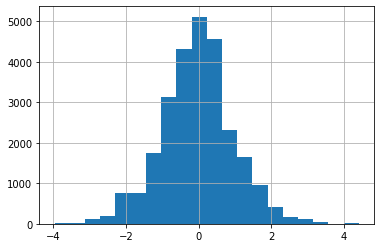

In [116]:
from sklearn.preprocessing import PowerTransformer

# Box-Cox 변환 후
trans = PowerTransformer(method='box-cox')

scaled_data['box_cox_income_total'] = trans.fit_transform(data['income_total'].values.reshape(-1, 1))
scaled_data['box_cox_income_total'].hist(bins=20)

<AxesSubplot:>

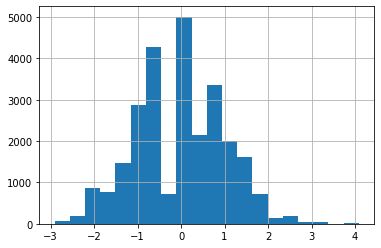

In [117]:
from sklearn.preprocessing import PowerTransformer

# Yeo-Johnson 변환 후
trans = PowerTransformer(method='yeo-johnson')

scaled_data['yeo_johnson_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['yeo_johnson_income_total'].hist(bins=20) 
# SCALED DATA 도 변환 가능.

<AxesSubplot:>

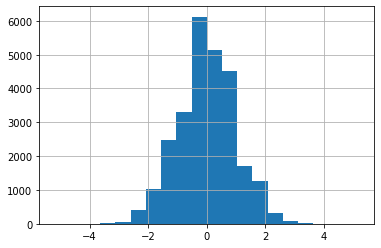

In [118]:
from sklearn.preprocessing import QuantileTransformer

# Quantile 변환 후
trans = QuantileTransformer(output_distribution='normal')

scaled_data['quantile_income_total'] = trans.fit_transform(scaled_data['income_total'].values.reshape(-1, 1))
scaled_data['quantile_income_total'].hist(bins=20)

---
## <span style="color:fuchsia">**📚 4. Missing Values**</span>


### <span style="color:fuchsia">**📚 4-1. 대표 값을 사용한 결측치 처리**</span>
- msno.bar, pd.isna(data).sum()

정형 데이터를 다루다보면, 값이 NaN(Not a Number or Null)으로 되어있는 경우가 있습니다. 이러한 값을 결측치라 하며, 

가장 간단한 방법으로 평균이나 중간값 또는 최빈값 같은 변수의 대표값을 사용할 수 있습니다.

결측치를 확인하는 방법으로 missingno 라이브러리의 `matrix()` 메소드를 사용하거나 Pandas의 `isna() + sum()` 메소드를 사용할 수 있습니다.

<div class="alert alert-block alert-danger">
    <b>주의</b> 결측치 처리는 가능하면 스케일링 작업 이전에 해주는 것이 좋습니다. 예를 들어 특정 컬럼의 결측치를 평균 값으로 대치하려고할 때 Standard Scaling을 진행하게되면 해당 컬럼의 결측치는 모두 0으로 대치될 수 있기 때문입니다. 
</div>


<AxesSubplot:>

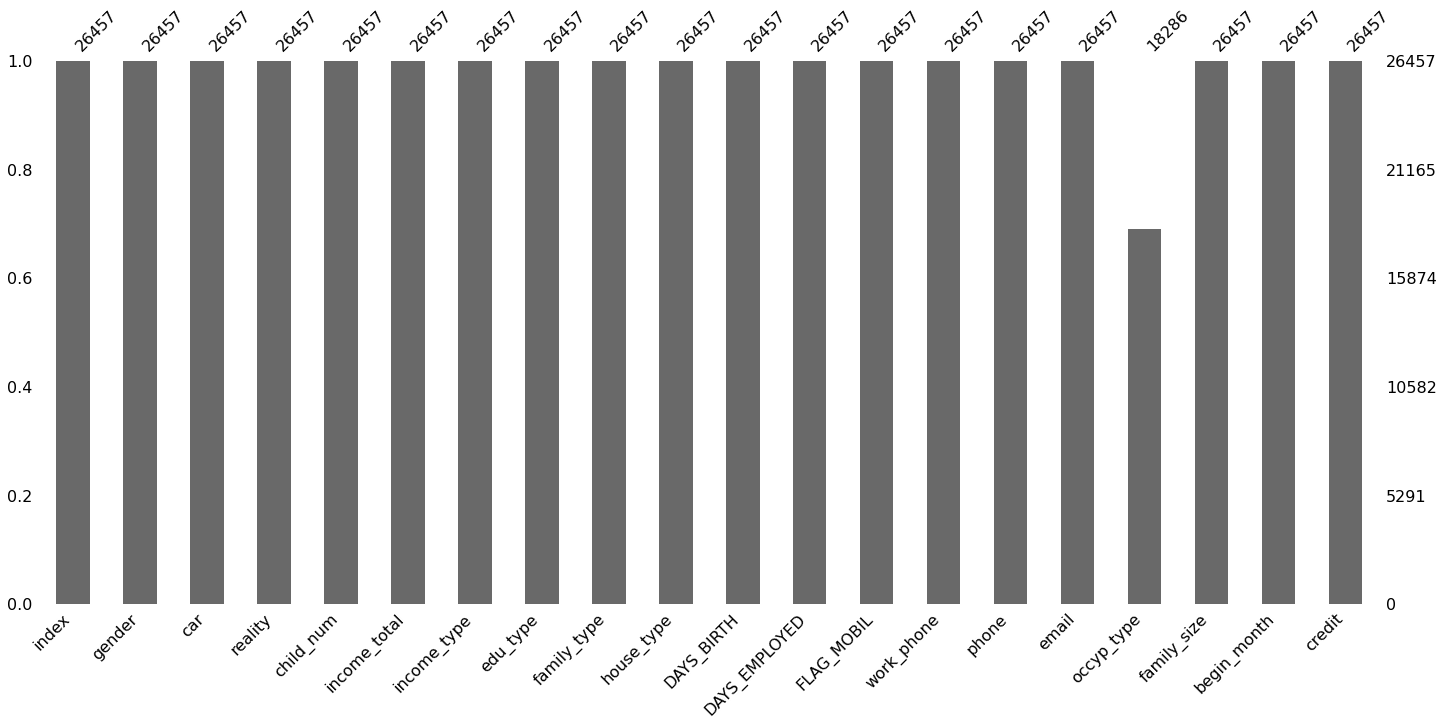

In [132]:
# msno.matrix(data)
msno.bar(data)

In [137]:
na_list = pd.isna(data).sum()
# print(na_list)
na_list[na_list > 0]

occyp_type    8171
dtype: int64

---
### <span style="color:fuchsia">**📚 4-2. 평균(mean) (모평균 = 기댓값)**</span>
- mean_df.loc[pd.isna(data['_']),'_'], pd.isna(mean_df[_]).sum(),  mean_df.groupby(['_','_','_'])[['_']].mean()

확률 이론과 통계 관점에서 (모)평균 또는 기댓값은 중심에 대한 경향성을 알 수 있는 척도입니다.

일반적으로 평균이라고 부르는 것으로 산술 평균이라고 하고, 이 평균은 표본 평균이라고도 합니다. (다 덧셈으로 더하고 갯수로 나눈 것.)

평균은 모든 관측치의 값을 모두 반영하므로 `지나치게 작거나 큰 값(이상치)들의 영향을 많이` 받게 됩니다.

평균은 모든 샘플의 값을 더하고, 샘플의 개수로 나누어 계산할 수 있습니다.

$$ E(x) = {\sum x \over n}$$

그냥바로 평균을 쓰지말고 그룹바이를 써라

In [138]:
mean_df = data.copy()

In [144]:
# row = pd.isna[mean_df['occyp_type']]
# col = 'occyp_type'

# mean_df.loc[row,col] = 

In [142]:
# pd.isna(data['index'])
mean_df.loc[pd.isna(data['occyp_type']),'occyp_type']

0        NaN
8        NaN
14       NaN
18       NaN
19       NaN
        ... 
26439    NaN
26441    NaN
26443    NaN
26449    NaN
26453    NaN
Name: occyp_type, Length: 8171, dtype: object

In [145]:
for c in num_columns:
    mean_df.loc[pd.isna(data[c]), c] = data[c].mean()

In [146]:
pd.isna(mean_df[num_columns]).sum()

index            0
child_num        0
income_total     0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
family_size      0
begin_month      0
credit           0
dtype: int64

평균의 속임수를 조심하기 위해서, 최대한 그룹을 세분화할 것. 적당히 합리적인 선에서.(직관적인 사고)

In [153]:
mean_df.groupby(['gender','car','reality'])[['income_total']].mean()

income_total
gender car reality               
F      N   N        154554.490299
           Y        167189.738410
       Y   N        193006.403754
           Y        205431.017613
M      N   N        195305.476036
           Y        200526.225782
       Y   N        223291.233909
           Y        227946.340361

---
### <span style="color:fuchsia">**📚 4-3. Median(중간값)**</span>   
- median_df.loc[pd.isna(data[c]), c] = data[c].median() // pd.isna(median_df[num_columns]).sum().sum()

중간값은 데이터 샘플을 개수에 대해서 절반으로 나누는 위치의 값을 말합니다.

데이터 샘플의 수가 짝수개일 때에는 중간에 위치한 두 값의 평균을 사용합니다.

중간값은 모든 관측치의 값을 모두 반영하지 않으므로 `지나치게 작거나 큰 값(이상치)들의 영향을 덜` 받습니다.<br>
중간값은 샘플을 값에 대해 정렬하고, 중앙에 위치한 값으로 구할 수 있습니다.

In [151]:
data.describe().T[['50%']]

,50%
index,13228.0
child_num,0.0
income_total,157500.0
DAYS_BIRTH,-15547.0
DAYS_EMPLOYED,-1539.0
FLAG_MOBIL,1.0
work_phone,0.0
phone,0.0
email,0.0
family_size,2.0


In [154]:
median_df = data.copy()

for c in num_columns:
    median_df.loc[pd.isna(data[c]), c] = data[c].median()

In [155]:
pd.isna(median_df[num_columns]).sum().sum()

0

---
### <span style="color:fuchsia">**📚 4-4. Iterative Impute (R 언어의 MICE 패키지)**</span> 
- IterativeImputer, imp_mean.fit_transform(impute_df[_]) // pd.isna(impute_df[_]).sum().sum()

Round robin 방식으로 반복하여 결측값을 회귀하는 방식으로 결측치를 처리합니다. 

결측값을 회귀하는 방식으로 처리하기 때문에 수치형 변수에만 적용할 수 있습니다.

1. 각 결측치를 해당 변수의 평균으로 채워넣는다. 
2. 대체할 변수의 결측치는 제외한 상태로 해당 변수의 결측치를 회귀모델을 이용하여 예측한다.
3. 다른 변수에서도 해당 방식을 반복한다.
4. 모든 변수에 대해 반복 후 해당 이터레이션에서 맨 처음에 할당했던 값과의 차이를 계산한다.
5. 해당 값의 차이가 0이 될 때(수렴)까지 반복한다.

#### Reference
- [Scikit-Learn, Iterative Imputer (MICE)](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html?highlight=mice)
- [MICE 알고리즘 설명](https://ichi.pro/ko/deiteo-seteueseo-gyeol-cheuggabs-eul-daechihaneun-mice-algolijeum-217004654686142)

// credit을 예측하듯이 빈칸들도 예측하면 좋지 않을까? 머신러닝으로? 
// 대표적인 리니얼리그레션, 로지스틱리그레션으로 예측.
// 라운드 로빈방식. 
// 회귀라는 건 연속된 값을 예측하는 것을 의미.
// 결측치 전부에 대해 평균으로 채움
// 특정 컬럼에 대해 머신러닝을 돌림. 결측치에 대해
// 첨엔 평균을 집어넣지만 이걸 n번 반복해서 
// 차이들에 대해서 계산을 하고 차이가 0이 될때 까지 반복
// 피쳐가 관계또 확실히 정의되어있고, 통계적인 유의미성도 가지고 있을것
// mice?라고한다.
// 반복적으로 채워넣는것. 시간이 좀 오래걸릴 수도 있음.
// 베이지안 릿지모델 등등


In [156]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [157]:
impute_df = data.copy()

In [158]:
imp_mean = IterativeImputer(random_state=0) # 랜덤 고정** 대회떄 중요. 이거에 따라 모델의 성능이 달라질 수 있음. 재현이 불가능할 수 있음. 방지하기위해 이거 ㄹ고정해놓으면 어떤 환경에서라도 똑같은 걸 반환. 결과의 재현을 위해서 할 수 있음.
impute_df[num_columns] = imp_mean.fit_transform(impute_df[num_columns]) # 채울 수 있음. 

In [159]:
pd.isna(impute_df[num_columns]).sum().sum() # 썸 두번. 각 컬럼의 결측치에대해 썸을 씌운것.

0

---
### <span style="color:fuchsia">**📚 4-5. Mode(최빈값)**</span>

최빈값은 범주형 변수에서 가장 자주 등장하는 값을 말합니다.

수치형인데 이산형도 괜츈
// 자녀 수, 차의 유무

In [160]:
mode_df = data.copy() 

In [ ]:
for c in cat_columns:
    mode_df.loc[pd.isna(data[c]), c] = data[c].mode()[0]

In [163]:
# value count 써도 됨.
mode_df['gender'].value_counts().sort_values().index[-1]
mode_df['gender'].mode()[0]

'F'

In [164]:
pd.DataFrame(mean_df.groupby(['car','reality'])['gender'].value_counts())

gender
car reality gender        
N   N       F         4020
            M         1231
    Y       F         9146
            M         2013
Y   N       M         1911
            F         1465
    Y       M         3605
            F         3066

결측치에 대해서 채워넣ㅇ르떄는 이렇게 보고 채워넣는게 좋다.
//이것도 가정이다. 그냥 최빈값을 넣었을 때 모델이 더 잘나올 수 이싿.
//여러개 모델을 만들어서(a/b테스트) 계속 실험해볼것.

//모델을 사용하는 방식은 비슷
//어떤 모델을 많이 사용하는가?
//앙상블은 모델들의 결과를 합침. 각 모델들의 특징
//? 리니어리그레션은 평균적인걸 잘뽑아냄.
//다양한 모델들을 만들 때 가장 중요한 게 무엇인가? 
//다양한 직관의 모델을 미리 만들어 놓는게 중요하다.
//따로 따로 훈련을 시켜서
//나중에 모델을 합치는 과정이 제일 중요.

In [165]:
pd.isna(mode_df[cat_columns]).sum().sum()

8171

지금 모델링을 하고, 새로운 데이터에서는 성능이 줄어들 수 있음.
//우리는 비즈니스적으로는 다시 튜닝을 해야할까?라는 고민을 해야함.


---
---
## <span style="color:fuchsia">**📚 5. Categorical Variable to Numeric Variable**</span>

이번에는 범주형 변수를 수치형 변수로 나타내는 방법에 대해 알아보겠습니다. 
여기에서 범주형 변수란, 차의 등급을 나타내는 [소형, 중형, 대형] 처럼 표현되는 변수를 말합니다. 

범주형 변수는 주로 데이터 상에서 문자열로 표현되는 경우가 많으며, 문자와 숫자가 매핑되는 형태로 표현되기도 합니다.

---
###  <span style="color:fuchsia">**📚 5-1. Label Encoding**</span>
라벨 인코딩은 n개의 범주형 데이터를 0~n-1 의 연속적인 수치 데이터로 표현합니다.<br>
예를 들어, 차의 등급 변수를 라벨 인코딩으로 변환하면 다음과 같이 표현할 수 있습니다.<br>

- 소형 : 0 
- 중형 : 1 
- 대형 : 2 

라벨 인코딩은 간단한 방법이지만, '소형'과 '중형'이라는 범주형 데이터가 가지고 있는 차이가 0과 1의 수치적인 차이라는 의미가 아님을 주의하셔야 합니다. 

Label Encoding도 Sklearn의 preprocessing 패키지에 있습니다.

#### Reference
- [Scikit-Learn Label Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html?highlight=label%20encoder#sklearn.preprocessing.LabelEncoder)

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# 나중머신러닝 모델 dt, lr 약자 많이 사용함.

In [166]:
data['family_type'].unique() # 5개로 0-4 mapping

array(['Married', 'Civil marriage', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [168]:
le.fit(data['family_type'])

LabelEncoder()

In [169]:
# classes_ 속성에 있는 순서(index)대로 라벨 번호가 부여됩니다.
le.classes_

array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
       'Widow'], dtype=object)

In [170]:
label_encoded = le.transform(data['family_type'])

In [174]:
for idx, val in enumerate(le.classes_):
    print(idx,val)

0 Civil marriage
1 Married
2 Separated
3 Single / not married
4 Widow


<AxesSubplot:xlabel='family_type', ylabel='count'>

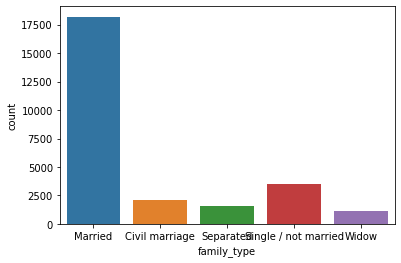

In [177]:
sns.countplot(data=data, x='family_type')
# 순서도 없고, 편향되어있고.. 머신러닝모델에서 독이 될 수 있음.
# 레이블 인코딩하면 모델의 성능이 떨어질 수 있음.
# 그 다음으로 사용하는 방법이 원핫인코딩임

In [175]:
result = pd.DataFrame({
    'family_type' : data['family_type'].values,
    'label' : label_encoded
})

result.head(20)
# 이 방식엔 문제점이 있음. 
# 이 데이터가 정규분포를 이룬다고 
# 절대 세퍼레이트에 정규분포가 이루어지진 않고,..

,family_type,label
0,Married,1
1,Civil marriage,0
2,Married,1
3,Married,1
4,Married,1
5,Married,1
6,Separated,2
7,Married,1
8,Married,1
9,Married,1


---
### <span style="color:fuchsia">**📚 5-2. One-hot Encoding**</span>
- // sklearn.preprocessing, ohe.fit, ohe.transform, pd.DataFrame // data['_'].map(_), data['_'].apply(lambda x : _.get(x,-1))

원핫 인코딩은 n개의 범주형 데이터를 n개의 비트(0,1) 벡터로 표현합니다. 

예를 들어, 위에서 언급한 소형, 중형, 대형으로 이루어진 범주형 변수를 원핫 인코딩을 통해 변환하면 다음과 같이 표현할 수 있습니다.

- 소형 : `[1, 0, 0]` 
- 중형 : `[0, 1, 0]` 
- 대형 : `[0, 0, 1]` 

* 각각 값의 내적값이 반드시 0으로 나옴. 데이터 간의 독립성이 확보. 데이터 전처리 방법 중 하나. 독립적인 관계를 표현하기 위해 사용

원핫 인코딩으로 범주형 데이터를 나타내게되면, 서로 다른 범주에 대해서는 벡터 내적을 취했을 때 내적 값이 0이 나오게 됩니다. 

이는 서로 다른 범주 데이터는 독립적인 관계라는 것을 표현할 수 있게 됩니다.

One-hot Encoding은 Sklearn의 preprocessing 패키지에 있습니다.

#### Reference
- [Scikit-Learn One-Hot Encoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder)

In [179]:
data[cat_columns].describe(include='O')
# 이정도면 개인 컴터에서 원핫인코딩 써도 됨.


,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type
count,26457,26457,26457,26457,26457,26457,26457,18286
unique,2,2,2,5,5,5,6,18
top,F,N,Y,Working,Secondary / secondary special,Married,House / apartment,Laborers
freq,17697,16410,17830,13645,17995,18196,23653,4512


단점은 데이터의 컬럼 수가 너무 많아짐.
// 실제 데이터 측면에서 봤을 떄는 26000 * 3 이 되는 것.
// 연산 데이터 78000 이 되어버림.
// 독립적관계에선 좋지만 일반적으로 속도가 느리기 떄문에
// spares 드물다 라는 데이터는 처리를 해줘야함.

In [180]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [181]:
ohe.fit(data[['family_type']])

OneHotEncoder(sparse=False)

In [183]:
ohe.categories_ # 위에선 class 

[array(['Civil marriage', 'Married', 'Separated', 'Single / not married',
        'Widow'], dtype=object)]

In [184]:
one_hot_encoded = ohe.transform(data[['family_type']])

In [185]:
one_hot_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

In [187]:
#강사님이라면 이렇게 할것
result = pd.DataFrame(data= one_hot_encoded,
                      columns=ohe.categories_, dtype=int)
result['family_type'] = data['family_type']
result.head(10)

,Civil marriage,Married,Separated,Single / not married,Widow,family_type
0,0,1,0,0,0,Married
1,1,0,0,0,0,Civil marriage
2,0,1,0,0,0,Married
3,0,1,0,0,0,Married
4,0,1,0,0,0,Married
5,0,1,0,0,0,Married
6,0,0,1,0,0,Separated
7,0,1,0,0,0,Married
8,0,1,0,0,0,Married
9,0,1,0,0,0,Married


In [188]:
data['edu_type'].unique() # 교육에는 순서가 있음. 여기서도 마찬가지로 순서가 있음.
# 순서적인 정보를 학습하지 못하기 떄문에 레이블 인코딩을 한 번 더 해서 새롭게 만들어주면
# 원핫, 레이블로 각각 만들어주면 모델에 도움이 된다?
# 

array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [189]:
edu_types = data['edu_type'].unique()
print(edu_types)

['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [191]:
edu_dict = {'Higher education' : 0,
            'Secondary / secondary special' : 1,
           'Incomplete higher' : 2,
            'Lower secondary' : 3,
            'Academic degree' : 4,
    
}
data['edu_type'].map(edu_dict)
data['edu_type'].apply(lambda x : edu_dict.get(x,-1))
# 시맨틱한 정보를 살펴봐도 된다.
# 사실 테크닉들이 많음.
# 대회 떄 시도할만한 게 뭐가 있냐면
# 여러개를 사용하면서 벤치마크를 만들 수 있음
# 가장 많이 쓰이는 건 target encoder
# 하루가 걸리는 설명인데.. 기본적으로 앞서서
# 카테고리형 데이터를 예측해서 넣는  것.
# 타겟데이터에 대해 엄청 오버피팅시키는 것.
# 대회성적을 위한 테크닉
# label로 모델이 돌아가는지 체크
# 원핫, 타겟을 사용해서 사용해보고
# 캣부스트 catboost encoder 해보셈( 성능이 꽤 좋음)
# 나머지는 가설에 따라 시도를 해보세용


0        0
1        1
2        0
3        1
4        0
        ..
26452    1
26453    0
26454    1
26455    2
26456    1
Name: edu_type, Length: 26457, dtype: int64


인코딩을 진행한 피처에 대해 스케일링을 진행할 필요가 없음
//사실정형데이터는 스케일링을 많이 진행하지 않음(리니얼리그레션떄문에 함.)

//범주형 인코딩을 할 때 훈련셋에서만 
//텍스트 데이터에 원래 없던값이 추가되면 다 동일하게(-1, 새로운값)으로 처리함.
//왜? 훈련시에 트레인데이터에 없었으면 큰 의미가 없기 때문에 테스트데이터셋에는 절대 전처리하면안되고 트레인 데이터에서 핏하고 실행.
//원래 없던 값 등장 많음. 잘 조정해야함.
//child수가 범주형데이터 수가 될 수 있음. 맥스값으로 처리해줘도 괜츈.
//훈련했떤 범위에 맞춰서 진행. clipping 바깥 범위를 잘라내는것.

결론적으로는 다양한 시도를 통해 찾아내는게 중요

강사님은 부스트 뭐시기를 함.

In [ ]:
columns = np.concatenate([np.array(['family_type']) , ohe.categories_[0]])

result = pd.DataFrame(data=
                      np.concatenate([data[['family_type']].values, 
                                      one_hot_encoded.reshape((-1, ohe.categories_[0].shape[0]))],                                             
                                     axis=1), 
                      columns=columns)
result.head(10)

링크공유해주심


---
---
## <span style="color:fuchsia">**📚 6. 제출**</span> 
- answer = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv')) // answer['0'] = result[:, 0], answer['1'] = result[:, 1], answer['2'] = result[:, 2] // answer.to_csv('__.csv', index=False)

In [195]:
from sklearn.tree import DecisionTreeClassifier

data = pd.read_csv(train_path)
data = data.drop(['credit'], axis=1)
cat_columns = [c for c, t in zip(data.dtypes.index, data.dtypes) if t=='O'] 
num_columns = [c for c in data.columns if c not in cat_columns]
# 대회처음할 떄 내가 생각하는 제출이 되는가? 샘플 서브미션에 맞게 제출하는게 중요
# 사이킷런 다양한 모델 써봐도 됨.

In [202]:
decision_tree = DecisionTreeClassifier(random_state=0, max_depth=3) # 랜덤 결과 고정, 

decision_tree = decision_tree.fit(data[num_columns], target) # 핏하고

In [203]:
result = decision_tree.predict_proba(test_data[num_columns]) # 각각의 확률 반환

In [204]:
result 

array([[0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       ...,
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844],
       [0.11192897, 0.18972259, 0.69834844]])

In [205]:
answer = pd.read_csv(os.path.join(BASE_DIR, 'sample_submission.csv'))
# pd.read_csv()
answer.head()

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0


In [206]:
answer['0'] = result[:, 0]
answer['1'] = result[:, 1]
answer['2'] = result[:, 2]

answer.head()

,index,0,1,2
0,26457,0.111929,0.189723,0.698348
1,26458,0.111929,0.189723,0.698348
2,26459,0.111929,0.189723,0.698348
3,26460,0.111929,0.189723,0.698348
4,26461,0.138594,0.237122,0.624285


In [207]:
answer.to_csv('test2.csv', index=False) # 제출형식으로 저장, 인덱스 

In [210]:
answer

,index,0,1,2
0,26457,0.111929,0.189723,0.698348
1,26458,0.111929,0.189723,0.698348
2,26459,0.111929,0.189723,0.698348
3,26460,0.111929,0.189723,0.698348
4,26461,0.138594,0.237122,0.624285
...,...,...,...,...
9995,36452,0.111929,0.189723,0.698348
9996,36453,0.111929,0.189723,0.698348
9997,36454,0.111929,0.189723,0.698348
9998,36455,0.111929,0.189723,0.698348


In [211]:
# !ls

In [ ]:
# 엑셀이나 노션에 정리해두는 게 좋음
# 제출.
# 성능에 따라 리더보드에 올라가게 됨.
# decisiontree나 classifier나 cat 컬럼들 바꿔보고
# 제출